<a href="https://colab.research.google.com/github/HarryPotter12/PractiseML/blob/master/Public_dataset_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import files

# Install Kaggle library
!pip install -q kaggle

uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [0]:
cd ..

/


In [0]:
!mkdir .kaggle

In [0]:
!cp /content/kaggle.json ~/.kaggle/kaggle.json

In [0]:
!kaggle datasets download -d wcukierski/enron-email-dataset

 96% 345M/358M [00:03<00:00, 143MB/s]
100% 358M/358M [00:03<00:00, 117MB/s]


In [0]:
!unzip \*.zip

Archive:  enron-email-dataset.zip
  inflating: emails.csv              


In [0]:
import io, email
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.colors import ListedColormap
data = pd.read_csv('emails.csv')

In [0]:
data.head()

,file,message
0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...
1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...
2,allen-p/_sent_mail/100.,Message-ID: <24216240.1075855687451.JavaMail.e...
3,allen-p/_sent_mail/1000.,Message-ID: <13505866.1075863688222.JavaMail.e...
4,allen-p/_sent_mail/1001.,Message-ID: <30922949.1075863688243.JavaMail.e...


In [0]:
data.columns
data['message'].iloc[0]

"Message-ID: <18782981.1075855378110.JavaMail.evans@thyme>\nDate: Mon, 14 May 2001 16:39:00 -0700 (PDT)\nFrom: phillip.allen@enron.com\nTo: tim.belden@enron.com\nSubject: \nMime-Version: 1.0\nContent-Type: text/plain; charset=us-ascii\nContent-Transfer-Encoding: 7bit\nX-From: Phillip K Allen\nX-To: Tim Belden <Tim Belden/Enron@EnronXGate>\nX-cc: \nX-bcc: \nX-Folder: \\Phillip_Allen_Jan2002_1\\Allen, Phillip K.\\'Sent Mail\nX-Origin: Allen-P\nX-FileName: pallen (Non-Privileged).pst\n\nHere is our forecast\n\n "

In [0]:
def get_text_from_email(msg):
    '''To get the content from email objects'''
    parts = []
    for part in msg.walk():
        if part.get_content_type() == 'text/plain':
            parts.append( part.get_payload() )
    return ''.join(parts)

def split_email_addresses(line):
    '''To separate multiple email addresses'''
    if line:
        addrs = line.split(',')
        addrs = frozenset(map(lambda x: x.strip(), addrs))
    else:
        addrs = None
    return addrs

In [0]:
# Parse the emails into a list email objects
messages = list(map(email.message_from_string, data['message']))
data.drop('message', axis=1, inplace=True)
# Get fields from parsed email objects
keys = messages[0].keys()

In [0]:
for key in keys:
    data[key] = [doc[key] for doc in messages]

# Parse content from emails
data['content'] = list(map(get_text_from_email, messages))
# Split multiple email addresses
data['From'] = data['From'].map(split_email_addresses)
data['To'] = data['To'].map(split_email_addresses)

# Extract the root of 'file' as 'user'
data['user'] = data['file'].map(lambda x:x.split('/')[0])
del messages

data.head()

,file,Message-ID,Date,From,To,Subject,Mime-Version,Content-Type,Content-Transfer-Encoding,X-From,X-To,X-cc,X-bcc,X-Folder,X-Origin,X-FileName,content,user
0,allen-p/_sent_mail/1.,<18782981.1075855378110.JavaMail.evans@thyme>,"Mon, 14 May 2001 16:39:00 -0700 (PDT)",(phillip.allen@enron.com),(tim.belden@enron.com),,1.0,text/plain; charset=us-ascii,7bit,Phillip K Allen,Tim Belden <Tim Belden/Enron@EnronXGate>,,,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",Allen-P,pallen (Non-Privileged).pst,Here is our forecast\n\n,allen-p
1,allen-p/_sent_mail/10.,<15464986.1075855378456.JavaMail.evans@thyme>,"Fri, 4 May 2001 13:51:00 -0700 (PDT)",(phillip.allen@enron.com),(john.lavorato@enron.com),Re:,1.0,text/plain; charset=us-ascii,7bit,Phillip K Allen,John J Lavorato <John J Lavorato/ENRON@enronXg...,,,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",Allen-P,pallen (Non-Privileged).pst,Traveling to have a business meeting takes the...,allen-p
2,allen-p/_sent_mail/100.,<24216240.1075855687451.JavaMail.evans@thyme>,"Wed, 18 Oct 2000 03:00:00 -0700 (PDT)",(phillip.allen@enron.com),(leah.arsdall@enron.com),Re: test,1.0,text/plain; charset=us-ascii,7bit,Phillip K Allen,Leah Van Arsdall,,,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Allen-P,pallen.nsf,test successful. way to go!!!,allen-p
3,allen-p/_sent_mail/1000.,<13505866.1075863688222.JavaMail.evans@thyme>,"Mon, 23 Oct 2000 06:13:00 -0700 (PDT)",(phillip.allen@enron.com),(randall.gay@enron.com),,1.0,text/plain; charset=us-ascii,7bit,Phillip K Allen,Randall L Gay,,,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Allen-P,pallen.nsf,"Randy,\n\n Can you send me a schedule of the s...",allen-p
4,allen-p/_sent_mail/1001.,<30922949.1075863688243.JavaMail.evans@thyme>,"Thu, 31 Aug 2000 05:07:00 -0700 (PDT)",(phillip.allen@enron.com),(greg.piper@enron.com),Re: Hello,1.0,text/plain; charset=us-ascii,7bit,Phillip K Allen,Greg Piper,,,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Allen-P,pallen.nsf,Let's shoot for Tuesday at 11:45.,allen-p


In [0]:
new_data = data[['Date']].copy()
clean_data = new_data[(new_data['Date'].str.slice(start=-25,stop=-21).astype(int) > 1998) & (new_data['Date'].str.slice(start=-25,stop=-21).astype(int) < 2003)]
clean_data['Date'] = clean_data['Date'].str.slice(stop=-12)
clean_data['Date'] = pd.to_datetime(clean_data['Date'], format="%a, %d %b %Y %H:%M:%S")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [0]:
clean_data['Value'] = 1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
hourly_data = pd.DataFrame()
hourly_data = clean_data.resample('H', on='Date').sum()

hourly_data['Date'] = hourly_data.index

In [0]:
ds = hourly_data.index.to_series()
hourly_data['Month'] = ds.dt.month
hourly_data['MonthDay'] = ds.dt.day
hourly_data['Weekday'] = ds.dt.dayofweek
hourly_data['TimeOfDay'] = ds.dt.hour

In [0]:
for i in hourly_data.index:
    if (hourly_data['TimeOfDay'][i] >= 5) & int(hourly_data['TimeOfDay'][i] <= 11):
        hourly_data['TimeOfDay'][i] = 'Morning' 
    elif (hourly_data['TimeOfDay'][i] >= 12) & (hourly_data['TimeOfDay'][i] <= 16):
        hourly_data['TimeOfDay'][i] = 'Afternoon'
    elif (hourly_data['TimeOfDay'][i] >= 17) & (hourly_data['TimeOfDay'][i] <= 21):
        hourly_data['TimeOfDay'][i] = 'Evening'
    else:
        hourly_data['TimeOfDay'][i] = 'Night'

clean_data.columns

In [0]:
from sklearn.model_selection import train_test_split
from patsy import dmatrices

X = pd.DataFrame(hourly_data)
y = hourly_data['Value'].astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

In [0]:
mask = np.random.rand(len(hourly_data)) < 0.7
df_train = hourly_data[mask]
df_test = hourly_data[~mask]
print('Training data set length='+str(len(df_train)))
print('Testing data set length='+str(len(df_test)))

34727
Training data set length=24331
Testing data set length=10396


In [0]:
import statsmodels.api as sm

In [0]:
from patsy import dmatrices

In [0]:
expr = """Value ~ C(Month)  + C(MonthDay) + C(Weekday) + C(TimeOfDay)"""

In [0]:
y_train, X_train = dmatrices(expr, df_train, return_type='dataframe')
y_test, X_test = dmatrices(expr, df_test, return_type='dataframe')

In [0]:
poisson_training_results = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit()

In [0]:
print(poisson_training_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Value   No. Observations:                24331
Model:                            GLM   Df Residuals:                    24280
Model Family:                 Poisson   Df Model:                           50
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -3.7846e+05
Date:                Sun, 17 Nov 2019   Deviance:                   7.0343e+05
Time:                        13:41:12   Pearson chi2:                 1.04e+06
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

In [0]:
poisson_predictions = poisson_training_results.get_prediction(X_test)
predictions_summary_frame = poisson_predictions.summary_frame()
print(predictions_summary_frame)

                          mean   mean_se  mean_ci_lower  mean_ci_upper
Date                                                                  
1999-01-04 03:00:00  22.213865  0.258237      21.713453      22.725810
1999-01-04 16:00:00  15.641542  0.187723      15.277904      16.013835
1999-01-04 22:00:00  22.213865  0.258237      21.713453      22.725810
1999-01-04 23:00:00  22.213865  0.258237      21.713453      22.725810
1999-01-05 00:00:00  27.169090  0.298225      26.590822      27.759934
...                        ...       ...            ...            ...
2002-12-20 09:00:00  33.672262  0.379285      32.937023      34.423913
2002-12-20 15:00:00  14.911021  0.176089      14.569857      15.260173
2002-12-20 17:00:00   4.397657  0.059304       4.282945       4.515441
2002-12-20 22:00:00  21.176391  0.241918      20.707508      21.655890
2002-12-21 00:00:00   1.822144  0.032558       1.759436       1.887086

[10396 rows x 4 columns]


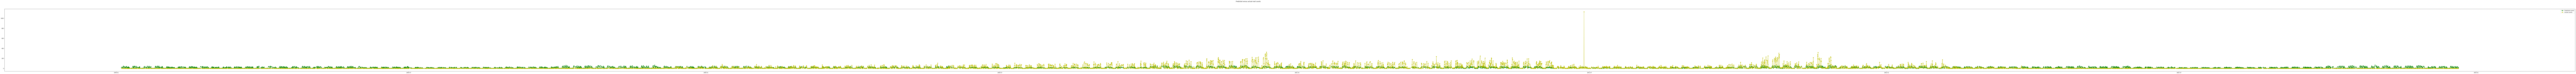

In [0]:
predicted_counts=predictions_summary_frame['mean']
actual_counts = y_test['Value']

plt.rcParams["figure.figsize"] = (400, 10)
fig = plt.figure()
fig.suptitle('Predicted versus actual mail counts ')
predicted, = plt.plot(X_test.index, predicted_counts, 'go-', label='Predicted counts')
actual, = plt.plot(X_test.index, actual_counts, 'yo-', label='Actual counts')
plt.legend(handles=[predicted, actual])
plt.show()

<Figure size 720x720 with 0 Axes>

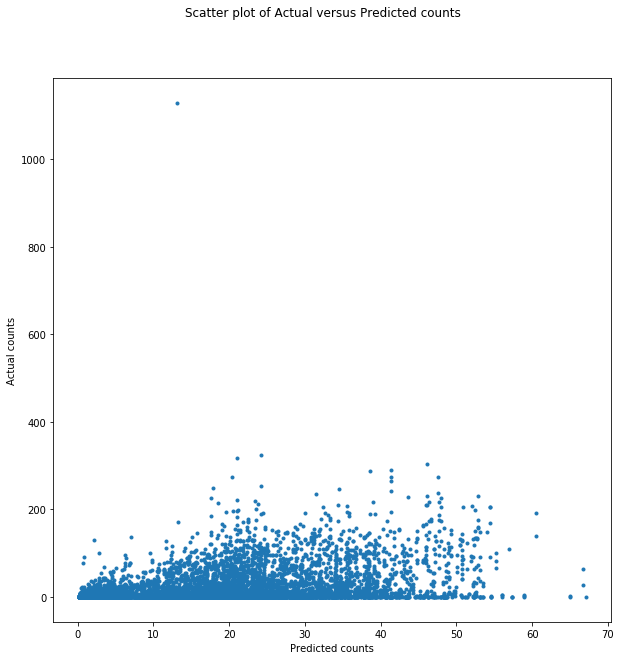

In [0]:
plt.rcParams["figure.figsize"] = (10, 10)
plt.clf()
fig = plt.figure()
fig.suptitle('Scatter plot of Actual versus Predicted counts')
plt.scatter(x=predicted_counts, y=actual_counts, marker='.')
plt.xlabel('Predicted counts')
plt.ylabel('Actual counts')
plt.show()